<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%207/Code%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s7'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate

In [0]:
classes, trainloader, testloader = data_loading.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat plane plane  deer  bird


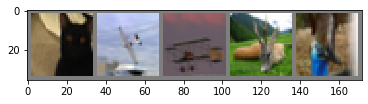

In [0]:
show_images.show_random_images(trainloader, classes)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
         MaxPool2d-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,608
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [0]:

EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0377936363220215 Batch_id=390 Accuracy=47.18: 100%|██████████| 391/391 [00:12<00:00, 31.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5687/10000 (56.87%)

EPOCH: 2


Loss=1.002281665802002 Batch_id=390 Accuracy=63.68: 100%|██████████| 391/391 [00:12<00:00, 32.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6761/10000 (67.61%)

EPOCH: 3


Loss=1.0082714557647705 Batch_id=390 Accuracy=69.76: 100%|██████████| 391/391 [00:11<00:00, 37.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7013/10000 (70.13%)

EPOCH: 4


Loss=0.7111889123916626 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [00:12<00:00, 31.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7393/10000 (73.93%)

EPOCH: 5


Loss=0.6760698556900024 Batch_id=390 Accuracy=75.47: 100%|██████████| 391/391 [00:12<00:00, 31.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7345/10000 (73.45%)

EPOCH: 6


Loss=0.7032599449157715 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [00:12<00:00, 32.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7554/10000 (75.54%)

EPOCH: 7


Loss=0.46913641691207886 Batch_id=390 Accuracy=78.48: 100%|██████████| 391/391 [00:11<00:00, 32.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7783/10000 (77.83%)

EPOCH: 8


Loss=0.5426986813545227 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [00:12<00:00, 40.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7893/10000 (78.93%)

EPOCH: 9


Loss=0.375953733921051 Batch_id=390 Accuracy=80.58: 100%|██████████| 391/391 [00:12<00:00, 31.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7712/10000 (77.12%)

EPOCH: 10


Loss=0.556516170501709 Batch_id=390 Accuracy=81.72: 100%|██████████| 391/391 [00:12<00:00, 31.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7730/10000 (77.30%)

EPOCH: 11


Loss=0.6089826822280884 Batch_id=390 Accuracy=82.28: 100%|██████████| 391/391 [00:11<00:00, 32.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7884/10000 (78.84%)

EPOCH: 12


Loss=0.5871251821517944 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:12<00:00, 32.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7905/10000 (79.05%)

EPOCH: 13


Loss=0.5363413691520691 Batch_id=390 Accuracy=83.48: 100%|██████████| 391/391 [00:11<00:00, 38.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7937/10000 (79.37%)

EPOCH: 14


Loss=0.5283504724502563 Batch_id=390 Accuracy=84.27: 100%|██████████| 391/391 [00:12<00:00, 32.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8066/10000 (80.66%)

EPOCH: 15


Loss=0.3951982855796814 Batch_id=390 Accuracy=84.87: 100%|██████████| 391/391 [00:11<00:00, 32.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7947/10000 (79.47%)

EPOCH: 16


Loss=0.5000654458999634 Batch_id=390 Accuracy=85.09: 100%|██████████| 391/391 [00:12<00:00, 38.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8027/10000 (80.27%)

EPOCH: 17


Loss=0.3705345690250397 Batch_id=390 Accuracy=85.54: 100%|██████████| 391/391 [00:12<00:00, 31.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7970/10000 (79.70%)

EPOCH: 18


Loss=0.20739920437335968 Batch_id=390 Accuracy=86.35: 100%|██████████| 391/391 [00:12<00:00, 34.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8039/10000 (80.39%)

EPOCH: 19


Loss=0.3280678987503052 Batch_id=390 Accuracy=86.74: 100%|██████████| 391/391 [00:12<00:00, 37.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7991/10000 (79.91%)

EPOCH: 20


Loss=0.30073755979537964 Batch_id=390 Accuracy=86.85: 100%|██████████| 391/391 [00:12<00:00, 31.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8094/10000 (80.94%)

EPOCH: 21


Loss=0.29768919944763184 Batch_id=390 Accuracy=87.16: 100%|██████████| 391/391 [00:12<00:00, 31.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7995/10000 (79.95%)

EPOCH: 22


Loss=0.36377811431884766 Batch_id=390 Accuracy=87.54: 100%|██████████| 391/391 [00:12<00:00, 31.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8107/10000 (81.07%)

EPOCH: 23


Loss=0.4351114332675934 Batch_id=390 Accuracy=87.97: 100%|██████████| 391/391 [00:12<00:00, 37.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8139/10000 (81.39%)

EPOCH: 24


Loss=0.34789976477622986 Batch_id=390 Accuracy=88.23: 100%|██████████| 391/391 [00:12<00:00, 31.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8140/10000 (81.40%)

EPOCH: 25


Loss=0.4353833794593811 Batch_id=390 Accuracy=88.45: 100%|██████████| 391/391 [00:12<00:00, 31.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8116/10000 (81.16%)

EPOCH: 26


Loss=0.4242095947265625 Batch_id=390 Accuracy=88.54: 100%|██████████| 391/391 [00:12<00:00, 31.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8142/10000 (81.42%)

EPOCH: 27


Loss=0.39492541551589966 Batch_id=390 Accuracy=88.86: 100%|██████████| 391/391 [00:12<00:00, 30.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8135/10000 (81.35%)

EPOCH: 28


Loss=0.509884774684906 Batch_id=390 Accuracy=89.35: 100%|██████████| 391/391 [00:12<00:00, 31.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8089/10000 (80.89%)

EPOCH: 29


Loss=0.4190276265144348 Batch_id=390 Accuracy=89.49: 100%|██████████| 391/391 [00:12<00:00, 31.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8121/10000 (81.21%)

EPOCH: 30


Loss=0.2982605993747711 Batch_id=390 Accuracy=89.75: 100%|██████████| 391/391 [00:12<00:00, 31.31it/s]



Test set: Average loss: 0.0051, Accuracy: 8156/10000 (81.56%)



GroundTruth:   frog  ship  deer   cat plane
Predicted:   frog  ship  deer   cat plane


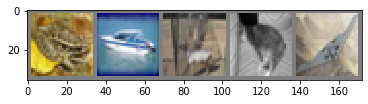

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 81 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 89 %
Accuracy of   car : 93 %
Accuracy of  bird : 83 %
Accuracy of   cat : 58 %
Accuracy of  deer : 93 %
Accuracy of   dog : 66 %
Accuracy of  frog : 94 %
Accuracy of horse : 82 %
Accuracy of  ship : 80 %
Accuracy of truck : 93 %
